In [1]:
#import dependencies
import ipynb
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import *
import seaborn as sns

#format all pandas charts as 2decimal
pd.options.display.float_format = '{:,.2f}'.format

# import clean dataframe from main file
from ipynb.fs.full.emissions_analysis import main_df
main_df
main_df.columns

Index(['Country', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission', 'Average Temperature °C',
       'rice_yield'],
      dtype='object')

In [2]:
# select only the needed columns
df = main_df[['Country'
              , 'Year'
              , 'Rural population'
              , 'Urban population'
              , 'Total Population - Male'
              , 'Total Population - Female'
              , 'total_emission'
              , 'Average Temperature °C']]

#add male and female population to get total pop
df['Total Population'] = (df['Total Population - Male'] 
                          + df['Total Population - Female'])

#rename temperature col
df = df.rename(columns={'Average Temperature °C': 'Avg Temp C'})

df = df.dropna()
# df.head()
df.describe()

C:\Users\NathanielMizzell\AppData\Local\Temp\ipykernel_17260\3266859043.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Population'] = (df['Total Population - Male']


,Year,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Avg Temp C,Total Population
count,"6,965.00","6,965.00","6,965.00","6,965.00","6,965.00","6,965.00","6,965.00","6,965.00"
mean,"2,005.12","17,857,735.39","16,932,296.97","17,619,629.63","17,324,469.29","64,091.24",0.87,"34,944,098.92"
std,8.89,"89,015,213.76","65,743,619.61","76,039,931.01","72,517,113.54","228,312.96",0.56,"148,546,213.70"
min,"1,990.00",0.00,0.00,250.00,270.00,"-391,884.06",-1.42,520.00
25%,"1,997.00","97,311.00","217,386.00","201,326.00","207,890.00","5,221.24",0.51,"408,145.00"
50%,"2,005.00","1,595,322.00","2,357,581.00","2,469,660.00","2,444,135.00","12,147.65",0.83,"4,895,243.00"
75%,"2,013.00","8,177,340.00","8,277,123.00","9,075,924.00","9,112,588.00","35,139.73",1.21,"18,177,572.00"
max,"2,020.00","900,099,113.00","902,077,760.00","743,586,579.00","713,341,908.00","3,115,113.75",3.56,"1,456,928,487.00"


## Research Question: How do Co2 Levels change as population changes?

Strategy: Create two scatter plots with regression lines. 

1. X = population, Y = Total emissions
2. X = population, Y = Temperature

Population will be the independent variable because we assume that changes in population influence temperature and population

# CO2 Levels and Population Change

In [3]:
#group df by country, take the average of all years in the sample
df_grouped = df.groupby(by='Country')

df_by_country = pd.DataFrame()
df_by_country['Country'] = df_grouped['Country'].first()
df_by_country['Total Population'] = df_grouped['Total Population'].mean()
df_by_country['Total Population - Female'] = df_grouped['Total Population - Female'].mean()
df_by_country['Total Population - Male'] = df_grouped['Total Population - Male'].mean()
df_by_country['Total Emissions'] = df_grouped['total_emission'].mean()
df_by_country['Avg Temp C'] = df_grouped['Avg Temp C'].mean()

df_by_country_no_outlier = df_by_country.loc[((df_by_country['Total Population'] <= 20000000) 
                                             & (df_by_country['Total Emissions'] <= 500000))]

df_by_country_no_outlier = df_by_country_no_outlier.reset_index(drop=True)
df_by_country_no_outlier

,Country,Total Population,Total Population - Female,Total Population - Male,Total Emissions,Avg Temp C
0,Albania,"3,064,276.87","1,531,393.03","1,532,883.84","3,696.33",0.89
1,American Samoa,"53,591.23","26,453.81","27,137.42","5,498.12",0.85
2,Andorra,"69,550.71","33,654.68","35,896.03","5,287.55",1.28
3,Anguilla,"12,051.65","6,115.45","5,936.19","12,338.00",0.69
4,Antigua and Barbuda,"79,427.03","41,704.29","37,722.74","2,604.91",0.69
...,...,...,...,...,...,...
172,Vanuatu,"222,329.84","109,669.29","112,660.55","3,438.68",0.55
173,Wallis and Futuna Islands,"13,542.81","6,862.45","6,680.35","11,063.49",0.58
174,Western Sahara,"348,994.23","161,350.84","187,643.39","12,877.02",1.29
175,Zambia,"12,259,991.58","6,278,629.58","5,981,362.00","78,426.29",0.64


In [4]:
#import countries CSV to get regions
continents = pd.read_csv('./continents.csv')
continents = continents[['name','region']]
continents.head()
# continents.columns

,name,region
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania


In [5]:
#merge country df to add regions
df_by_country_no_outlier = pd.merge(left=df_by_country_no_outlier
                         ,right=continents
                         ,left_on='Country'
                         ,right_on='name'
                         )

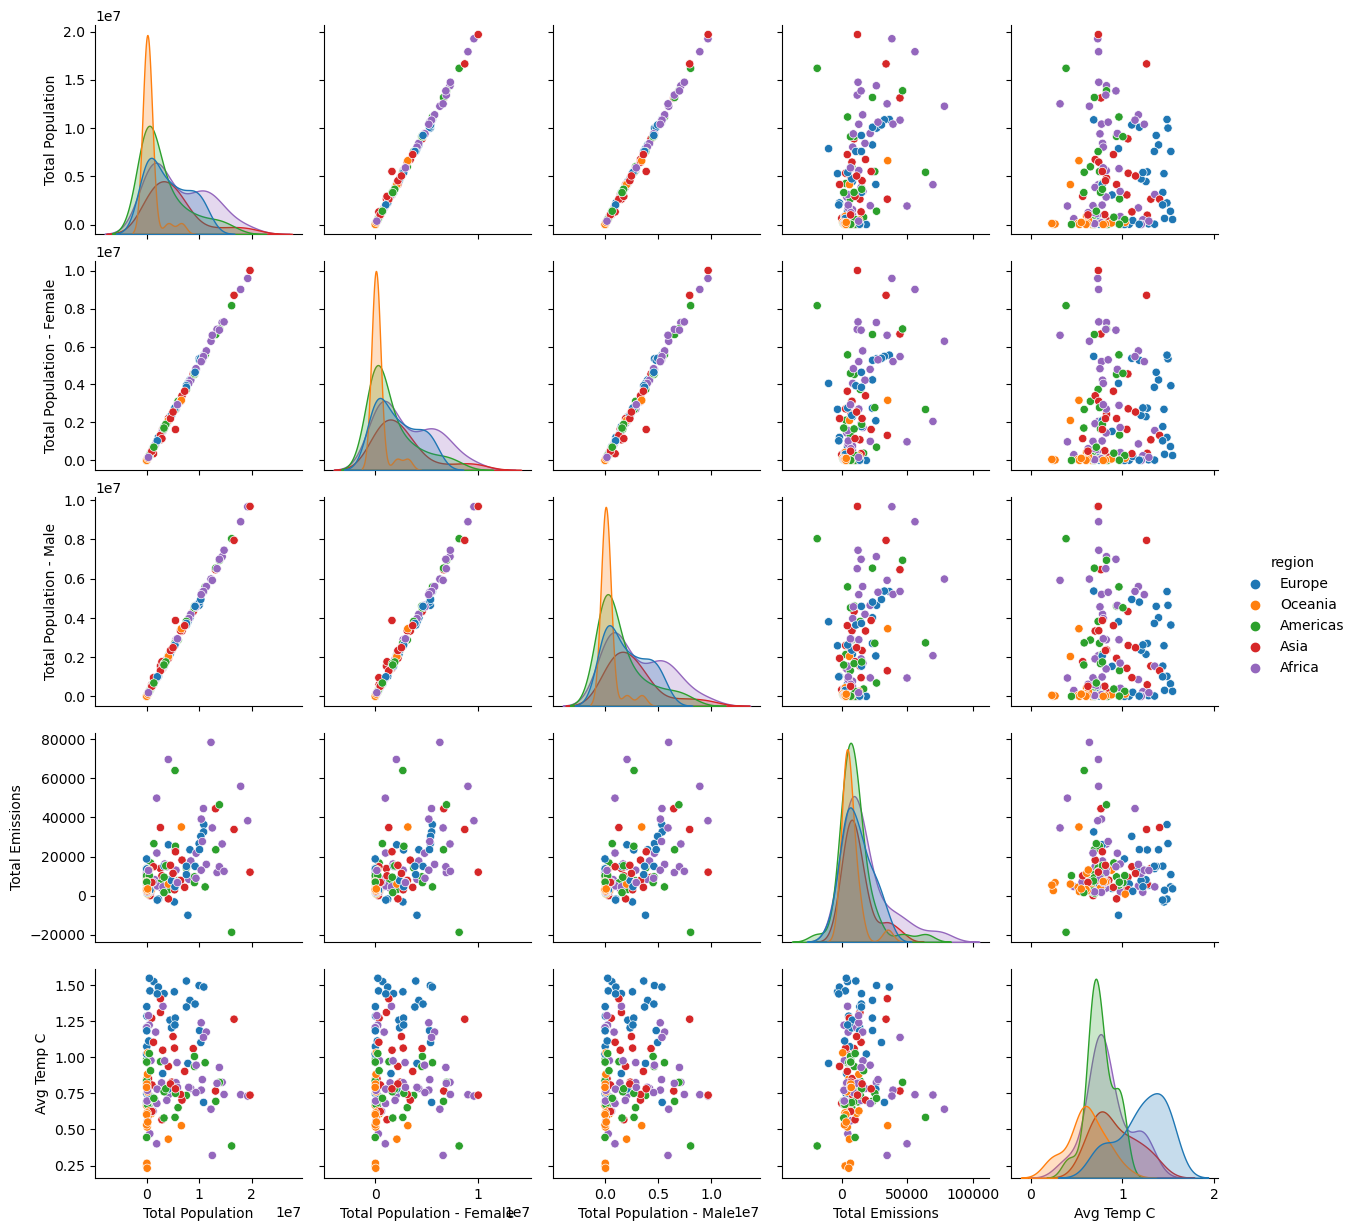

In [6]:
#plot everything
sns.pairplot(df_by_country_no_outlier, hue='region')

In [17]:
#create function for regression plotting
# Define a function to create Linear Regression plots
def regress(x, y, xlabel, ylabel, chart_title):
    regression = linregress(x,y)
    plt.plot(x, y, 'o', label='Data')
    plt.plot(x, regression.intercept + regression.slope * x, label='Line of Best Fit')
    plt.legend()
    plt.title(chart_title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    m = regression.slope
    b = regression.intercept
    plt.figtext(x=0, y=0, s=f'\nY = {m}X + {b}')
    plt.show()

    rvalue = regression.rvalue
    pvalue = regression.pvalue
    print(f"rvalue = {rvalue}\npvalue = {pvalue}")

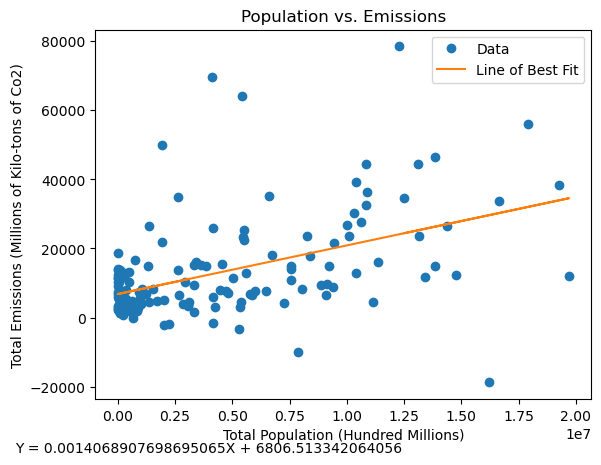

rvalue = 0.4822014757173664
pvalue = 1.6103465823900846e-10


In [18]:
x = df_by_country_no_outlier['Total Population']
y = df_by_country_no_outlier['Total Emissions']
xlabel = 'Total Population (Hundred Millions)'
ylabel = 'Total Emissions (Millions of Kilo-tons of Co2)'
chart_title = 'Population vs. Emissions'

regress(x, y, xlabel, ylabel, chart_title)


Interpretation of the results:

There is a strong positive linear relationship between the average population and average total emissions by country during the period of 1990 - 2020. In other words, as population increases, total emissions tend to increase at a rate of 1.2 tons (0.0012 Kilo-Tons) of Co2 per person, per year.

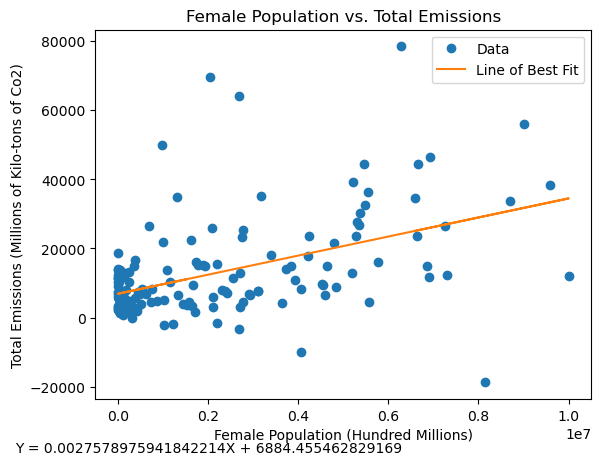

rvalue = 0.4794574464327213
pvalue = 2.1125176088544075e-10


In [19]:
x = df_by_country_no_outlier['Total Population - Female']
y = df_by_country_no_outlier['Total Emissions']
xlabel = 'Female Population (Hundred Millions)'
ylabel = 'Total Emissions (Millions of Kilo-tons of Co2)'
chart_title = 'Female Population vs. Total Emissions'

regress(x, y, xlabel, ylabel, chart_title)

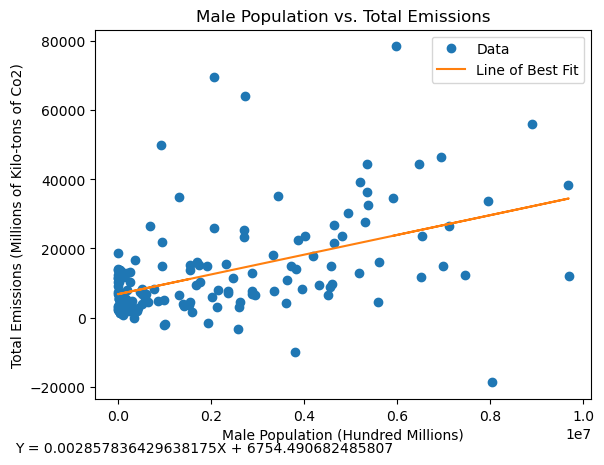

rvalue = 0.4838469420226381
pvalue = 1.3668768226159888e-10


In [20]:
x = df_by_country_no_outlier['Total Population - Male']
y = df_by_country_no_outlier['Total Emissions']
xlabel = 'Male Population (Hundred Millions)'
ylabel = 'Total Emissions (Millions of Kilo-tons of Co2)'
chart_title = 'Male Population vs. Total Emissions'

regress(x, y, xlabel, ylabel, chart_title)

## Test the data for the following conditions so that the ANOVA test will produce meaningful results:
1. Independent Samples
2. Samples are from normally distributed populations
3. Population Stdev groups are all equal (homoscedasticity)

In [21]:
#Independent Samples?

#Male and Female Populations are Independent. No Test is Required

In [22]:
#Normality Tests
alpha = 0.05

normal_male = normaltest(df_by_country_no_outlier['Total Population - Male']).pvalue
normal_female = normaltest(df_by_country_no_outlier['Total Population - Female']).pvalue

print('Male:')
if normal_male > alpha : print('Reject the Ho that the data is Normally Distributed')
else: print('Fail to reject the Ho that the data is Normally Distributed')

print('\nFemale:')
if normal_female > alpha : print('Reject the Ho that the data is Normally Distributed')
else: print('Fail to reject the Ho that the data is Normally Distributed')

Male:
Fail to reject the Ho that the data is Normally Distributed

Female:
Fail to reject the Ho that the data is Normally Distributed


In [23]:
#Levene Test (Homoscedasticity)
alpha = 0.05

levene_male_female = levene(df_by_country_no_outlier['Total Population - Female']
                            , df_by_country['Total Population - Male']).pvalue

print('Levene Test Results:')
if levene_male_female > alpha: print('Reject the Ho that the variances are equal')
else: print('Fail to reject the Ho that the variances are equal')


Levene Test Results:
Fail to reject the Ho that the variances are equal


## Test Results:
1. Independent : Pass
2. Normal: Pass
3. Homoscedastic: Pass

Conclusion: ANOVA test may be applied to the data.

In [24]:
#ANOVA Test: Do the two groups have the same population mean?
#with context: Do the male and female groups have the same average population?

male_female_anova = f_oneway(df_by_country_no_outlier['Total Population - Male']
                             ,df_by_country_no_outlier['Total Population - Female']).pvalue

alpha = 0.05

if male_female_anova > alpha: print('Reject the Ho that the groups have the same population mean')
else: print('Fail to reject the Ho that the groups have the same population mean')

Reject the Ho that the groups have the same population mean
